In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD

C:\Users\Noor\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Noor\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Noor\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Noor\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1 +np.sin(0.5*np.arange(200))**5

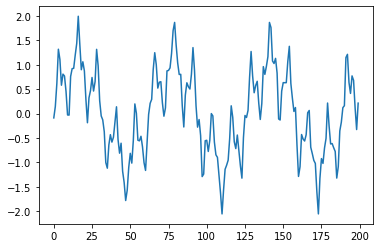

In [4]:
plt.plot(series)
plt.show()

In [5]:
T = 10
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1,T)
Y = np.array(Y)
N = len(X)
print("X.shape",X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [6]:
i = Input(shape = (T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss = "mse", optimizer = Adam(lr = 0.1), metrics = ['mean_squared_error'])

#train the NN
history = model.fit(X[:-N//2],Y[:-N//2],epochs = 80, validation_data = (X[-N//2:],Y[-N//2:]))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 95 samples, validate on 95 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/80
95/95 [==============================] - 0s 1ms/sample - loss: 0.7574 - mean_squared_error: 0.7574 - val_loss: 0.5942 - val_mean_squared_error: 0.5942
Epoch 2/80
95/95 [==============================] - 0s 110us/sample - loss: 0.4795 - mean_squared_error: 0.4795 - val_loss: 0.2854 - val_mean_squared_error: 0.2854
Epoch 3/80
95/95 [==============================] - 0s 107us/sample - loss: 0.2577 - mean_squared_error: 0.2577 - val_loss: 0.4017 - val_mean_squared_error: 0.4017
Epoch 4/80
95/95 [==============================] - 0s 126us/sample - loss: 0.3291 - mean_squared_error: 0.3291 - val_loss: 0.2005 - val_mean_squared_error: 0.2005
Epoch 5/80
95/95 [==============================] - 0s 137us/sample - loss: 0.1577 - mean_squared_error: 0.1577 - val_loss: 0.2159 - v

95/95 [==============================] - 0s 105us/sample - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0413 - val_mean_squared_error: 0.0413
Epoch 46/80
95/95 [==============================] - 0s 95us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 47/80
95/95 [==============================] - 0s 105us/sample - loss: 0.0379 - mean_squared_error: 0.0379 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 48/80
95/95 [==============================] - 0s 105us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0407 - val_mean_squared_error: 0.0407
Epoch 49/80
95/95 [==============================] - 0s 95us/sample - loss: 0.0384 - mean_squared_error: 0.0384 - val_loss: 0.0412 - val_mean_squared_error: 0.0412
Epoch 50/80
95/95 [==============================] - 0s 84us/sample - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 51/80
95/95 [======

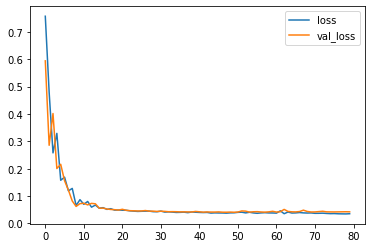

In [7]:
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()

In [8]:
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1,-1))[0,0] #1*1 array -> scalar
    i+=1
    
    
    #update the predictions list
    validation_predictions.append(p)

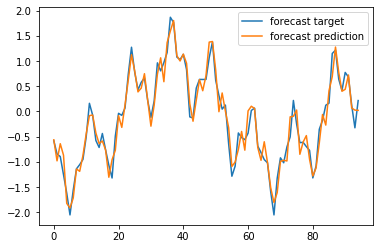

In [9]:
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = "forecast prediction")
plt.legend()

In [10]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1,-1))[0,0] #1*1 array -> scalar
    
    
    #update the predictions list
    validation_predictions.append(p)
    
    last_x = np.roll(last_x,-1)
    last_x[-1] = p

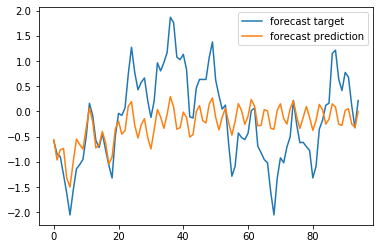

In [11]:
plt.plot(validation_target, label = "forecast target")
plt.plot(validation_predictions, label = "forecast prediction")
plt.legend()